In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1 Tiền xử lý dữ liệu (Data pre-processing)

1.1 Tải xuống và đọc tập dữ liệu


In [2]:
import numpy
from keras.datasets import cifar10
import numpy as np
np.random.seed(10) # tạo ra số giả ngẫu nhiên dựa trên giá trị seed và ở đây seed=10
(X_train,y_train),(X_test, y_test)=cifar10.load_data() # tải tập dữ liệu lên 2 mảng train và test 
print('số ảnh dùng để train:',len(X_train))
print('số ảnh dùng để test :',len(X_test))
print('kích cỡ ảnh train :',X_train.shape)
print('kích cỡ train_label :',y_train.shape)
print('kích cỡ ảnh test :',X_test.shape)
print('kích cỡ test_label :',y_test.shape)


170508288/170498071 [==============================] - 4s 0us/step
số ảnh dùng để train: 50000
số ảnh dùng để test : 10000
kích cỡ ảnh train : (50000, 32, 32, 3)
kích cỡ train_label : (50000, 1)
kích cỡ ảnh test : (10000, 32, 32, 3)
kích cỡ test_label : (10000, 1)


In [3]:
print("Nhìn vào các pixel của bức tranh => là một ma trận 3 chiều")
print(X_train[0])

Nhìn vào các pixel của bức tranh => là một ma trận 3 chiều
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [4]:
print(y_train.shape)
print(y_train[:5])


(50000, 1)
[[6]
 [9]
 [9]
 [4]
 [1]]


1.2 Hình dung một phần của tập huấn luyện


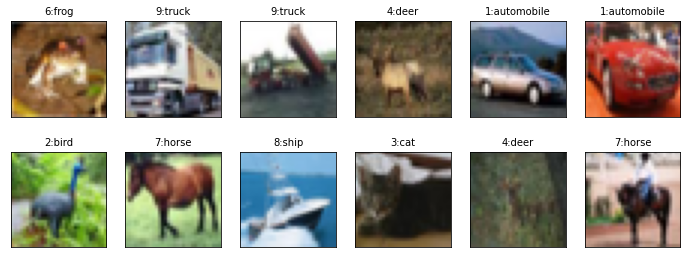

In [5]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}
# tạo một từ điển và gán các giá trị từ 1 đến 9 cho các loại ảnh
import matplotlib.pyplot as plt
def showImageandLabel(images,labels,idx,num=10):
    fig = plt.gcf() # lấy số liệu của 1 hình ảnh và gán cho fig
    fig.set_size_inches(12, 14) # kiểm soát kích thước hình ảnh
    if num>25: num=25  #Hiển thị lên đến 25
    for i in range(0, num):
        ax=plt.subplot(6,6, 1+i)
        ax.imshow(images[idx],cmap='binary') # hiển thị dữ liệu dưới dạng hình ảnh, cmap để ánh xạ dữ liệu vô hướng với màu sắc và ở đây là loại binary
        title=str(labels[i][0])+':'+label_dict[labels[i][0]]# Danh mục tương ứng với hình thứ i
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]); # để đặt các vị trí xtick trên trục x nhưng bên trong là chuỗi rỗng nên các giá trị tick sẽ không nhìn thấy
        ax.set_yticks([])  # để đặt các vị trí ytick trên trục y nhưng bên trong là chuỗi rỗng nên các giá trị tick sẽ không nhìn thấy      
        idx+=1 
    plt.savefig('1.png') # lưu hình ảnh vào 1 file tên 1.png
    plt.show()

# prediction=y_label_train[:12] # giả sử predict chính là tạp train luôn
# prediction=[i[0] for i in prediction] # lấy cột đầu tiên thôi
# print("12 ảnh đầu của tập train:" ,prediction)
showImageandLabel(X_train,y_train,0,12)#bắt đầu từ 0 kết thúc tại 12


1.3 Chuẩn hóa hình ảnh(Image normalize)

In [6]:
print(X_train[0][0][0]) #（50000，32，32，3）
X_train_normalize = X_train.astype('float32') / 255.0  # chuẩn hóa dữ liệu X_train về dạng số float 32bit sau khi chia 255 thì dữ liệu đầu vào từ 0.0 đến 1.0
X_test_normalize = X_test.astype('float32') / 255.0
print(X_train_normalize[0][0][0])


[59 62 63]
[0.23137255 0.24313726 0.24705882]


In [7]:
from keras.utils import np_utils
y_train_OneHot = np_utils.to_categorical(y_train)   # hàm to_categorical giúp chuyển đổi vector thành một ma trận nhị phân có số hàng bằng độ dài của vector đầu vào và số cột bằng số lớp
y_test_OneHot = np_utils.to_categorical(y_test)
print(y_train_OneHot.shape)
print(y_train_OneHot[:5])


(50000, 10)
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


2. convolutional layer network

2.1 Xây dựng mô hình

In [8]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)
# tải tập dữ liệu
(X_train,y_train),(X_test,y_test)=cifar10.load_data()
print("train data:",'images:',X_train.shape,
      " labels:",y_train.shape) 
print("test  data:",'images:',X_test.shape ,
      " labels:",y_test.shape) 
# Chuẩn hóa
X_train_normalize = X_train.astype('float32') / 255.0
X_test_normalize = X_test.astype('float32') / 255.0
# One-Hot Encoding
from keras.utils import np_utils
y_train_OneHot = np_utils.to_categorical(y_train) # hàm to_categorical giúp chuyển đổi vector thành một ma trận nhị phân có số hàng bằng độ dài của vector đầu vào và số cột bằng số lớp
y_test_OneHot = np_utils.to_categorical(y_test)
y_test.shape

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


(10000, 1)

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(3, 3),input_shape=(32, 32,3),activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3),activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3),  activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Xây dựng mạng nơ-ron (lớp phẳng, lớp ẩn, lớp đầu ra)
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(2500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
print(model.summary())#in tóm tắt mô hình


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0         
                                                        

In [ ]:
#Số GPU được sử dụng trong cài đặt đào tạo trước
import os  
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # cài đặt biến môi trường để chỉ định sử dụng một GPU cụ thể
os.environ["CUDA_VISIBLE_DEVICES"]="0"         # Sẽ chỉ sử dụng thiết bị GPU đầu tiên


2.2 Quy trình đào tạo

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
train_history=model.fit(X_train_normalize, y_train_OneHot,
                        validation_split=0.2,
                        epochs=40, batch_size=300, verbose=1)       
# categorical_crossentropy , adam => có những cách nào nx, metrics
# fit là gì ,validation_split 02 thể hiện m , epochs=40, batch_size=300, verbose=1) 

Epoch 1/40
134/134 [==============================] - 17s 42ms/step - loss: 1.9546 - accuracy: 0.2667 - val_loss: 1.7129 - val_accuracy: 0.3809
Epoch 2/40
134/134 [==============================] - 5s 37ms/step - loss: 1.5373 - accuracy: 0.4313 - val_loss: 1.4140 - val_accuracy: 0.4893
Epoch 3/40
134/134 [==============================] - 5s 37ms/step - loss: 1.3355 - accuracy: 0.5126 - val_loss: 1.2881 - val_accuracy: 0.5324
Epoch 4/40
134/134 [==============================] - 5s 37ms/step - loss: 1.1859 - accuracy: 0.5719 - val_loss: 1.1082 - val_accuracy: 0.5918
Epoch 5/40
134/134 [==============================] - 5s 38ms/step - loss: 1.0604 - accuracy: 0.6204 - val_loss: 0.9460 - val_accuracy: 0.6712
Epoch 6/40
134/134 [==============================] - 5s 37ms/step - loss: 0.9655 - accuracy: 0.6558 - val_loss: 0.9056 - val_accuracy: 0.6785
Epoch 7/40
134/134 [==============================] - 5s 37ms/step - loss: 0.8819 - accuracy: 0.6882 - val_loss: 0.8527 - val_accuracy: 0.702

In [11]:
print(train_history)#in object lịch sử đào tạo
print(train_history.epoch) # in list epoch
print(train_history.history) #in lịch sử dào tạo
print(train_history.model) # in thông tin model


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
{'loss': [1.9545732736587524, 1.5372668504714966, 1.3355228900909424, 1.185867428779602, 1.0604040622711182, 0.9655203819274902, 0.881919801235199, 0.8216733336448669, 0.7626118659973145, 0.7081342339515686, 0.6691209673881531, 0.6142305731773376, 0.5886044502258301, 0.5456452369689941, 0.5094743967056274, 0.4782918393611908, 0.4535764157772064, 0.42417582869529724, 0.40178123116493225, 0.3772772252559662, 0.3548051416873932, 0.34627559781074524, 0.31935662031173706, 0.31535816192626953, 0.2887358069419861, 0.27916139364242554, 0.2622086703777313, 0.25910139083862305, 0.24744033813476562, 0.23284763097763062, 0.23474140465259552, 0.22213301062583923, 0.21111322939395905, 0.20889373123645782, 0.20063963532447815, 0.19719910621643066, 0.1881534457206726, 0.18316669762134552, 0.17123495042324066, 0.17126555740833282], 'accuracy': [0.2667250

In [12]:
#Sử dụng Pickle để lưu các đối tượng
import pickle
filename = '/content/drive/MyDrive/Tài liệu năm 3/kỳ 2 năm 3/Nhập môn TTNT/cifar10/train_history.pickle'
pickle.dump(train_history, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://7d2d77f8-aa88-47c2-bc81-25ca12600ea7/assets


In [13]:
loaded_model = pickle.load(open(filename, 'rb'))
print(loaded_model)

2.3 Hình dung quá trình đào tạo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


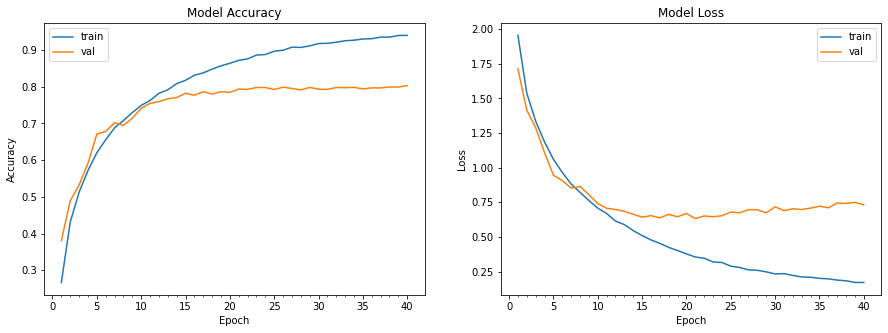

In [14]:
import matplotlib.pyplot as plt
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # vẽ đồ thị độ chính xác
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy']) #vẽ đồ thị accuracy
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy']) #vẽ đồ thị val_accuracy
    axs[0].set_title('Model Accuracy') #đặt tiêu đề đồ thị
    axs[0].set_ylabel('Accuracy') #đặt tiêu đề trục y
    axs[0].set_xlabel('Epoch') #đặt tiêu đề trục x
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10) #lấy vị trí và nhãn của trục x
    axs[0].legend(['train', 'val'], loc='best') #hiển thị ghi chú trong đồ thị
    # vẽ đồ thị độ tổn thất
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss']) #vẽ đồ thị loss
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss']) #vẽ đồ thị val_loss
    axs[1].set_title('Model Loss') #đặt tiêu đề đồ thị
    axs[1].set_ylabel('Loss') #đặt tiêu đề trục y
    axs[1].set_xlabel('Epoch') #đặt tiêu đề trục x
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10) #lấy vị trí và nhãn của trục x
    axs[1].legend(['train', 'val'], loc='best') #hiển thị ghi chú trong đồ thị
    plt.show() #xuất đồ thị
plot_model_history(loaded_model)


2.4 Đánh giá mô hình

In [16]:
scores = model.evaluate(X_test_normalize, 
                        y_test_OneHot,verbose=0)
print(scores)
print(scores[0])

[0.7737974524497986, 0.7961999773979187]
0.7737974524497986


2.5 Kết quả dự đoán

In [17]:
# Lấy 10 đầu tiên làm ví dụ, các lớp dự đoán (danh mục dự đoán, nghĩa là giá trị lớn nhất của đầu ra softmax)
pre=model.predict(X_test_normalize) # phương thức này giúp ta dự đoán nhãn của các giá trị dữ liệu và trả về các nhãn của dữ liệu dựa trên dữ liệu đã học
prediction=np.argmax(pre,axis=1) # trả về các chỉ số của phần tử lớn nhất theo một trục cụ thể ở đây axis=1 là theo trục dọc
print(prediction[:10])
# print(prediction[:10])

[5 8 8 0 6 6 1 2 3 1]


In [18]:

#Hình dung một số kết quả dự báo 
import matplotlib.pyplot as plt
def showImageandLabelPrediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(6,6, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(labels[i][0])+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()
def show_Predicted_Probability(y,prediction,x_img,Predicted_Probability,i):
    print('label:',label_dict[y[i][0]],'predict:',label_dict[prediction[i]]) #....ý nghĩa
    plt.figure(figsize=(2,2)) # tạo một hình mới hoặc kích hoạt một hình hiện có với kích thước cài sẵn
    plt.imshow(np.reshape(X_test[i],(32, 32,3)))# định dạng lại dữ liệu hình ảnh với kích thước bằng reshape sau đó hiển thị dữ liệu dữ liệu dưới dạng hình ảnh
    plt.show()
    for j in range(10):
        print(label_dict[j]+' Probability:%1.9f'%(Predicted_Probability[i][j]))

label: cat predict: dog


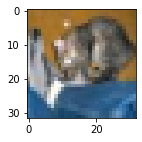

airplane Probability:0.000000311
automobile Probability:0.000098272
bird Probability:0.000002930
cat Probability:0.418175370
deer Probability:0.000000140
dog Probability:0.581629157
frog Probability:0.000034494
horse Probability:0.000015406
ship Probability:0.000005065
truck Probability:0.000038796
-----------------------------------------
label: airplane predict: airplane


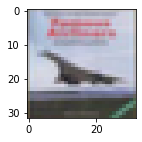

airplane Probability:0.992006719
automobile Probability:0.000000639
bird Probability:0.006313846
cat Probability:0.000003422
deer Probability:0.000002927
dog Probability:0.000000304
frog Probability:0.000000011
horse Probability:0.000000004
ship Probability:0.001671850
truck Probability:0.000000368


In [19]:
Predicted_Probability = model.predict(X_test_normalize) # phương thức này giúp ta dự đoán nhãn của các giá trị dữ liệu và trả về các nhãn của dữ liệu dựa trên dữ liệu đã học
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}
show_Predicted_Probability(y_test,prediction,X_test,Predicted_Probability,0)
print("-----------------------------------------")
show_Predicted_Probability(y_test,prediction,X_test,Predicted_Probability,3)


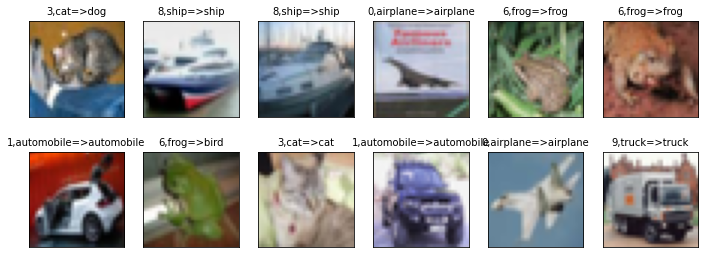

In [22]:
showImageandLabelPrediction(X_test,y_test,prediction,0, 12)


2.7 Hiển thị ma trận nhầm lẫn

In [23]:
print("prediction.shape=", str(prediction.shape), ", y_label_test.shape=",str(y_test.shape))
print(y_test)
print(y_test.reshape(-1))# # Chuyển đổi sang mảng 1D


prediction.shape= (10000,) , y_label_test.shape= (10000, 1)
[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]
[3 8 8 ... 5 1 7]


In [24]:
import pandas as pd
print(label_dict)
pd.crosstab(y_test.reshape(-1),prediction,rownames=['label'],colnames=['predict'])

# ma trận hỗn loạn
# crosstab sẽ tạo ra một bảng tính toán đơn giản ở đây các hàng sẽ là danh sách các nhãn, các cột là danh sách các dự đoán nhãn
#.......row , colummn

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,819,12,53,12,11,3,6,7,61,16
1,7,922,3,3,3,5,6,1,13,37
2,50,2,725,37,57,46,45,22,13,3
3,25,6,71,556,55,174,53,40,10,10
4,22,3,55,33,764,20,41,57,5,0
5,7,4,37,119,41,734,10,38,8,2
6,4,7,48,37,26,17,844,6,9,2
7,11,0,19,27,36,34,4,861,2,6
8,38,23,10,9,4,2,2,5,895,12


In [ ]:
path='/content/drive/MyDrive/Tài liệu năm 3/kỳ 2 năm 3/Nhập môn TTNT/cifar10/finalmodel.h5'
model.save(path) #lưu mô hình
